<a href="https://colab.research.google.com/github/shivanshudwivedi/Deep-Learning/blob/main/Training_from_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Storing a tabular data in the form of a dataframe

import pandas as pd
import numpy as np
df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 5)
display(df)


In [ ]:
#Storing a tabular data in the form of a dataframe

import pandas as pd
import numpy as np
from scipy.stats import zscore

df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Data Pre processing with the help of pandas of tabular data

#Not needed here but can be done for species column
'''
dummies = pd.get_dummies(df['species'], prefix = 'job')
df = pd.concat([df, dummies], axis = 1)
df.head()
med = df['sepal_length'].median()
df['sepal_length'] = df['sepal_length'].fillna(med)
'''

#Conversion of Pandas to NumPy
x_columns = df.columns.drop('species')
x = df[x_columns].values
dummies = pd.get_dummies(df['species'])
species = dummies.columns
y = dummies.values


In [ ]:
#ROC Chart Plotting for Neural Network for Binary Classification
import pandas as pd
import pandas as pd
from scipy.stats import zscore
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

file_path = '/content/Cancer_Data.csv'
df = pd.read_csv(file_path, na_values = ['NA', '?'])
#Prepare data by applying zscore to all the x columns
x_columns = df.columns.drop('id').drop('diagnosis')
for col in x_columns:
  df[col] = zscore(df[col])
#Convert NumPy to regression
x = df[x_columns].values
y = df['diagnosis'].map({"M": 1, "B": 0}).values #Binary Classification as converts M to 0 and B to 1

#Dividing data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
y_test = np.nan_to_num(y_test)

#Building Neural Networks
model = Sequential()
model.add(Dense(100, input_dim = x.shape[1], activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(25, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))
model.compile(loss = 'binary_crossentropy', optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = ' auto',  restore_best_weights = True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

#Predicting the output
pred = model.predict(x_test)
#plot_roc(pred, y_test)
#Plot ROC
def plot_roc(pred, y):
  fpr, tpr, _ = roc_curve(y, pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, label = 'ROC Curve')
  plt.plot([0,1], [0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc = 'lower right')
  plt.show()



In [ ]:
#Multiclass Classification
from scipy.stats import zscore
import pandas as pd
import numpy as np
import io
import os
import tensorflow.keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import display

#Read Data Set
df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])
df.head()

#If dummies present then generate dummies for those columns, else not needed at all
#After that also make sure that there are no empty values

#Standardize Scores
df['sepal_length'] = zscore(df['sepal_length'])
df['sepal_width'] = zscore(df['sepal_width'])
df['petal_length'] = zscore(df['petal_length'])
df['petal_width'] = zscore(df['petal_width'])

#Convert Pandas to NumPy
x_columns = df.columns.drop('species')
x = df[x_columns].values
dummies = pd.get_dummies(df['species'])
types = dummies.columns
y = dummies.values

#Split into train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Building the Neural Network
model = Sequential()
model.add(Dense(100, input_dim = x.shape[1], activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(25, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(y.shape[1], activation = 'softmax', kernel_initializer = 'random_normal'))

model.compile(loss = 'categorical_crossentropy', optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 100)

#Computing Accuracy
pred = model.predict(x_test)
pred = np.argmax(pred, axis = 1)
y_compare = np.argmax(y_train, axis = 1)
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy Score: ", score)

#Compute Log Loss
np.set_printoptions(precision = 4)
np.set_printoptions(suppress = True)

display(pred[0:5])
log_loss_score = metrics.log_loss(y_test, pred, labels = [1, 2, 3])
print('Log Loss: ', log_loss_score)


In [ ]:
#Plotting a Confusion Matrix for MultiClass Classification

#Performing the classification first
#Multiclass Classification
from scipy.stats import zscore
import pandas as pd
import numpy as np
import io
import os
import tensorflow.keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import display
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

#Read Data Set
df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])
df.head()

#If dummies present then generate dummies for those columns, else not needed at all
#After that also make sure that there are no empty values

#Standardize Scores
df['sepal_length'] = zscore(df['sepal_length'])
df['sepal_width'] = zscore(df['sepal_width'])
df['petal_length'] = zscore(df['petal_length'])
df['petal_width'] = zscore(df['petal_width'])

#Convert Pandas to NumPy
x_columns = df.columns.drop('species')
x = df[x_columns].values
dummies = pd.get_dummies(df['species'])
types = dummies.columns
y = dummies.values

#Split into train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Building the Neural Network
model = Sequential()
model.add(Dense(100, input_dim = x.shape[1], activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(25, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(y.shape[1], activation = 'softmax', kernel_initializer = 'random_normal'))

model.compile(loss = 'categorical_crossentropy', optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 100)

#Computing Accuracy
pred = model.predict(x_test)
pred = np.argmax(pred, axis = 1)
y_compare = np.argmax(y_train, axis = 1)
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy Score: ", score)

#Compute Log Loss
np.set_printoptions(precision = 4)
np.set_printoptions(suppress = True)

display(pred[0:5])
log_loss_score = metrics.log_loss(y_test, pred, labels = [1, 2, 3])
print('Log Loss: ', log_loss_score)


#Now defining the Confusion Matrix
%matplotlib inline
def plot_confusion_matrix(cm, names, title = 'Confusion Matrix', cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(names))
  plt.xticks(tick_marks, names, rotation = 45)
  plt.yticks(tick_marks, names)
  plt.tight_layout()
  plt.ylabel('True Layout')
  plt.xlabel('Predicetd Layout')

#Plotting the Confusion Matrix

#Compute the confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision = 2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, species)


#Normalizing every row
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized Confusion Matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, species, title  ='Normalized Confusion Matrix')
plt.show()


In [ ]:
#Training a Regression from Tabular data
import io
import os
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

#Creating the DataFrame
df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Data Pre Processing
#Creating dummies for type species for categorization
dummies = pd.get_dummies(df['species'], prefix = 'species')
df = pd.concat([df, dummies], axis = 1)
df.drop('species', axis = 1, inplace = True)
df.head()

#To check if null
#If null then the values are filled by the median values
# df[column_name] = df[column_name].fillna(df[column_name].median())

#Standardizing Data
df['sepal_width'] = zscore(df['sepal_width'])
df['sepal_length'] = zscore(df['sepal_length'])
df['petal_length'] = zscore(df['petal_length'])
df['petal_width'] = zscore(df['petal_width'])
df['species_Iris-setosa'] = zscore(df['species_Iris-setosa'])
df['species_Iris-versicolor'] = zscore(df['species_Iris-versicolor'])
df['species_Iris-virginica'] = zscore(df['species_Iris-virginica'])

#Converting to NumPy classification
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values.ravel()

#Dividing the data set into test and train parts
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

#Building the Neural Network
model = Sequential()
model.add(Dense(25, input_dim = x.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 100)

#Predicting the values
pred = model.predict(x_test).flatten()
#Measure the Mean Squared Error
score = metrics.mean_squared_error(pred, y_test)
print('Score: ', score)

#Measure the Root Mean Squared Error
rmse_score = np.sqrt(score)
print('RMSE Score: ', rmse_score)

Epoch 1/100
4/4 - 2s - loss: 1.0801 - val_loss: 1.0706 - 2s/epoch - 580ms/step
Epoch 2/100
4/4 - 0s - loss: 0.9391 - val_loss: 0.9238 - 135ms/epoch - 34ms/step
Epoch 3/100
4/4 - 0s - loss: 0.8107 - val_loss: 0.7959 - 74ms/epoch - 18ms/step
Epoch 4/100
4/4 - 0s - loss: 0.7193 - val_loss: 0.6896 - 132ms/epoch - 33ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6265 - val_loss: 0.6103 - 114ms/epoch - 28ms/step
Epoch 6/100
4/4 - 0s - loss: 0.5609 - val_loss: 0.5481 - 169ms/epoch - 42ms/step
Epoch 7/100
4/4 - 0s - loss: 0.5138 - val_loss: 0.4916 - 129ms/epoch - 32ms/step
Epoch 8/100
4/4 - 0s - loss: 0.4762 - val_loss: 0.4401 - 159ms/epoch - 40ms/step
Epoch 9/100
4/4 - 0s - loss: 0.4400 - val_loss: 0.3973 - 93ms/epoch - 23ms/step
Epoch 10/100
4/4 - 0s - loss: 0.4077 - val_loss: 0.3613 - 118ms/epoch - 30ms/step
Epoch 11/100
4/4 - 0s - loss: 0.3831 - val_loss: 0.3299 - 161ms/epoch - 40ms/step
Epoch 12/100
4/4 - 0s - loss: 0.3613 - val_loss: 0.3033 - 54ms/epoch - 14ms/step
Epoch 13/100
4/4 - 0s - loss: 

2/2 [==============================] - 0s 6ms/step
Score:  0.18935280273806865
RMSE Score:  0.43514687490325454


Epoch 1/100
4/4 - 2s - loss: 1.0345 - val_loss: 0.9722 - 2s/epoch - 383ms/step
Epoch 2/100
4/4 - 0s - loss: 0.7635 - val_loss: 0.7217 - 73ms/epoch - 18ms/step
Epoch 3/100
4/4 - 0s - loss: 0.5968 - val_loss: 0.5733 - 77ms/epoch - 19ms/step
Epoch 4/100
4/4 - 0s - loss: 0.5018 - val_loss: 0.4815 - 70ms/epoch - 17ms/step
Epoch 5/100
4/4 - 0s - loss: 0.4372 - val_loss: 0.4085 - 79ms/epoch - 20ms/step
Epoch 6/100
4/4 - 0s - loss: 0.3952 - val_loss: 0.3610 - 73ms/epoch - 18ms/step
Epoch 7/100
4/4 - 0s - loss: 0.3668 - val_loss: 0.3259 - 132ms/epoch - 33ms/step
Epoch 8/100
4/4 - 0s - loss: 0.3479 - val_loss: 0.2978 - 99ms/epoch - 25ms/step
Epoch 9/100
4/4 - 0s - loss: 0.3319 - val_loss: 0.2860 - 72ms/epoch - 18ms/step
Epoch 10/100
4/4 - 0s - loss: 0.3169 - val_loss: 0.2792 - 60ms/epoch - 15ms/step
Epoch 11/100
4/4 - 0s - loss: 0.3089 - val_loss: 0.2695 - 58ms/epoch - 15ms/step
Epoch 12/100
4/4 - 0s - loss: 0.3018 - val_loss: 0.2656 - 56ms/epoch - 14ms/step
Epoch 13/100
4/4 - 0s - loss: 0.2948 

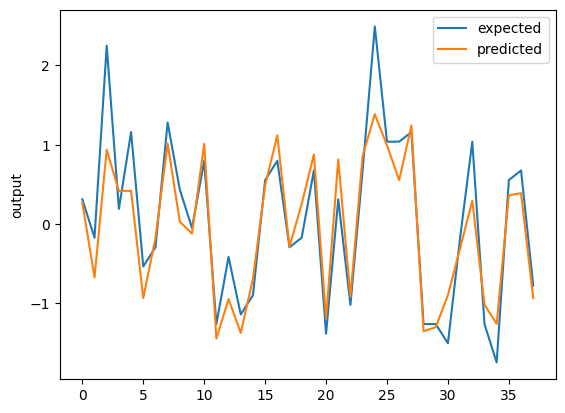

In [ ]:
#Creating a Life Chart for a regression

import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

#Creating the DataFrame
df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Data Pre Processing
#Creating dummies for type species for categorization
dummies = pd.get_dummies(df['species'], prefix = 'species')
df = pd.concat([df, dummies], axis = 1)
df.drop('species', axis = 1, inplace = True)
df.head()

#To check if null
#If null then the values are filled by the median values
# df[column_name] = df[column_name].fillna(df[column_name].median())

#Standardizing Data
df['sepal_width'] = zscore(df['sepal_width'])
df['sepal_length'] = zscore(df['sepal_length'])
df['petal_length'] = zscore(df['petal_length'])
df['petal_width'] = zscore(df['petal_width'])
df['species_Iris-setosa'] = zscore(df['species_Iris-setosa'])
df['species_Iris-versicolor'] = zscore(df['species_Iris-versicolor'])
df['species_Iris-virginica'] = zscore(df['species_Iris-virginica'])

#Converting to NumPy classification
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values.ravel()

#Dividing the data set into test and train parts
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

#Building the Neural Network
model = Sequential()
model.add(Dense(25, input_dim = x.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 100)

#Predicting the values
pred = model.predict(x_test).flatten()
#Measure the Mean Squared Error
score = metrics.mean_squared_error(pred, y_test)
print('Score: ', score)

#Measure the Root Mean Squared Error
rmse_score = np.sqrt(score)
print('RMSE Score: ', rmse_score)

#Defining the function to print the chart for regression
def chart_regression(pred, y, sort = True):
  t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
  if sort:
    t.sort_values(by = ['y'], ascending = True)
  plt.plot(t['y'].tolist(), label = 'expected')
  plt.plot(t['pred'].tolist(), label = 'predicted')
  plt.ylabel('output')
  plt.legend()
  plt.show()

chart_regression(pred.flatten(), y_test)

In [ ]:
#Error Calculation from Scratch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from sklearn import metrics

#Creating sample values
predicted = [1.1, 1.9, 3.4, 4.2, 4.3]
expected = [1, 2, 3, 4, 5]

score_mse = metrics.mean_squared_error(predicted, expected)
score_rmse = np.sqrt(score_mse)
print('MSE: ', score_mse)
print('RMSE: ', score_rmse)

#Manually Calculating the values
score = ((predicted[0] - expected[0])**2 + (predicted[1] - expected[1])**2 + (predicted[2] - expected[2])**2 + (predicted[3] - expected[3])**2 + (predicted[4] - expected[4])**2)/len(predicted)
print('Manual Score: ', score)

MSE:  0.14200000000000007
RMSE:  0.37682887362833556
Manual Score:  0.14200000000000007
